In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
# ^^^ pyforest auto-imports - don't write above this line


In [2]:
df = pd.read_csv("sample-pitch-dat.csv")

<IPython.core.display.Javascript object>

In [8]:
df.corr().style.background_gradient()

,isstrike,IsLefthandedPitcher,IsLefthandedBatter,inning,balls,strikes,pitchtypeid,ReleaseSpeed,PlateX,PlateZ,ReleaseX,ReleaseZ,Extension,SpinRate,SpinDirection,X0,Y0,Z0,VerticalBreak,InducedVertBreak
isstrike,1.000000,0.001048,-0.010693,-0.013438,-0.032388,-0.283956,-0.036900,0.028630,-0.032994,0.092877,-0.000993,-0.000232,-0.011679,0.032492,-0.000654,-0.000993,0.011331,-0.000232,-0.001283,0.038058
IsLefthandedPitcher,0.001048,1.000000,-0.168098,-0.054219,-0.004566,0.002097,-0.015128,-0.113278,-0.081773,0.011765,0.921500,0.024221,-0.043047,-0.065879,0.040423,0.921500,0.044454,0.024221,0.378388,0.024753
IsLefthandedBatter,-0.010693,-0.168098,1.000000,0.000855,0.028088,-0.010393,-0.005210,0.021360,-0.222860,0.044399,-0.150731,-0.011522,-0.014550,-0.034602,0.080444,-0.150731,0.013858,-0.011522,-0.152313,0.003168
inning,-0.013438,-0.054219,0.000855,1.000000,0.012614,-0.001039,-0.003950,0.038871,0.002116,0.010842,-0.047089,-0.102109,0.020083,0.035642,-0.012005,-0.047089,-0.019006,-0.102109,-0.006224,-0.025830
balls,-0.032388,-0.004566,0.028088,0.012614,1.000000,0.323196,0.001619,0.083296,-0.002940,-0.019153,-0.002168,-0.021686,0.036902,-0.028402,0.042168,-0.002168,-0.037143,-0.021686,-0.039645,0.071647
strikes,-0.283956,0.002097,-0.010393,-0.001039,0.323196,1.000000,0.019406,-0.021859,0.051214,-0.107686,0.008812,-0.018309,0.036049,0.015492,-0.017694,0.008812,-0.035685,-0.018309,0.019087,-0.067316
pitchtypeid,-0.036900,-0.015128,-0.005210,-0.003950,0.001619,0.019406,1.000000,-0.154711,0.001406,-0.165202,-0.014609,-0.078147,-0.039482,-0.286972,0.094096,-0.014609,0.038730,-0.078147,-0.077428,-0.195806
ReleaseSpeed,0.028630,-0.113278,0.021360,0.038871,0.083296,-0.021859,-0.154711,1.000000,-0.035918,0.244981,-0.108917,0.070918,0.133952,-0.028372,0.278319,-0.108917,-0.134926,0.070918,-0.316605,0.741928
PlateX,-0.032994,-0.081773,-0.222860,0.002116,-0.002940,0.051214,0.001406,-0.035918,1.000000,-0.202031,-0.049804,0.011943,0.053267,0.098361,-0.205572,-0.049804,-0.052150,0.011943,0.186341,-0.054997
PlateZ,0.092877,0.011765,0.044399,0.010842,-0.019153,-0.107686,-0.165202,0.244981,-0.202031,1.000000,0.015753,0.033051,-0.072118,-0.011686,0.091856,0.015753,0.070445,0.033051,-0.058532,0.304855


array([[<Axes: title={'center': 'isstrike'}>,
        <Axes: title={'center': 'IsLefthandedPitcher'}>,
        <Axes: title={'center': 'IsLefthandedBatter'}>,
        <Axes: title={'center': 'inning'}>],
       [<Axes: title={'center': 'balls'}>,
        <Axes: title={'center': 'strikes'}>,
        <Axes: title={'center': 'pitchtypeid'}>,
        <Axes: title={'center': 'ReleaseSpeed'}>],
       [<Axes: title={'center': 'PlateX'}>,
        <Axes: title={'center': 'PlateZ'}>,
        <Axes: title={'center': 'ReleaseX'}>,
        <Axes: title={'center': 'ReleaseZ'}>],
       [<Axes: title={'center': 'Extension'}>,
        <Axes: title={'center': 'SpinRate'}>,
        <Axes: title={'center': 'SpinDirection'}>,
        <Axes: title={'center': 'X0'}>],
       [<Axes: title={'center': 'Y0'}>, <Axes: title={'center': 'Z0'}>,
        <Axes: title={'center': 'VerticalBreak'}>,
        <Axes: title={'center': 'InducedVertBreak'}>]], dtype=object)

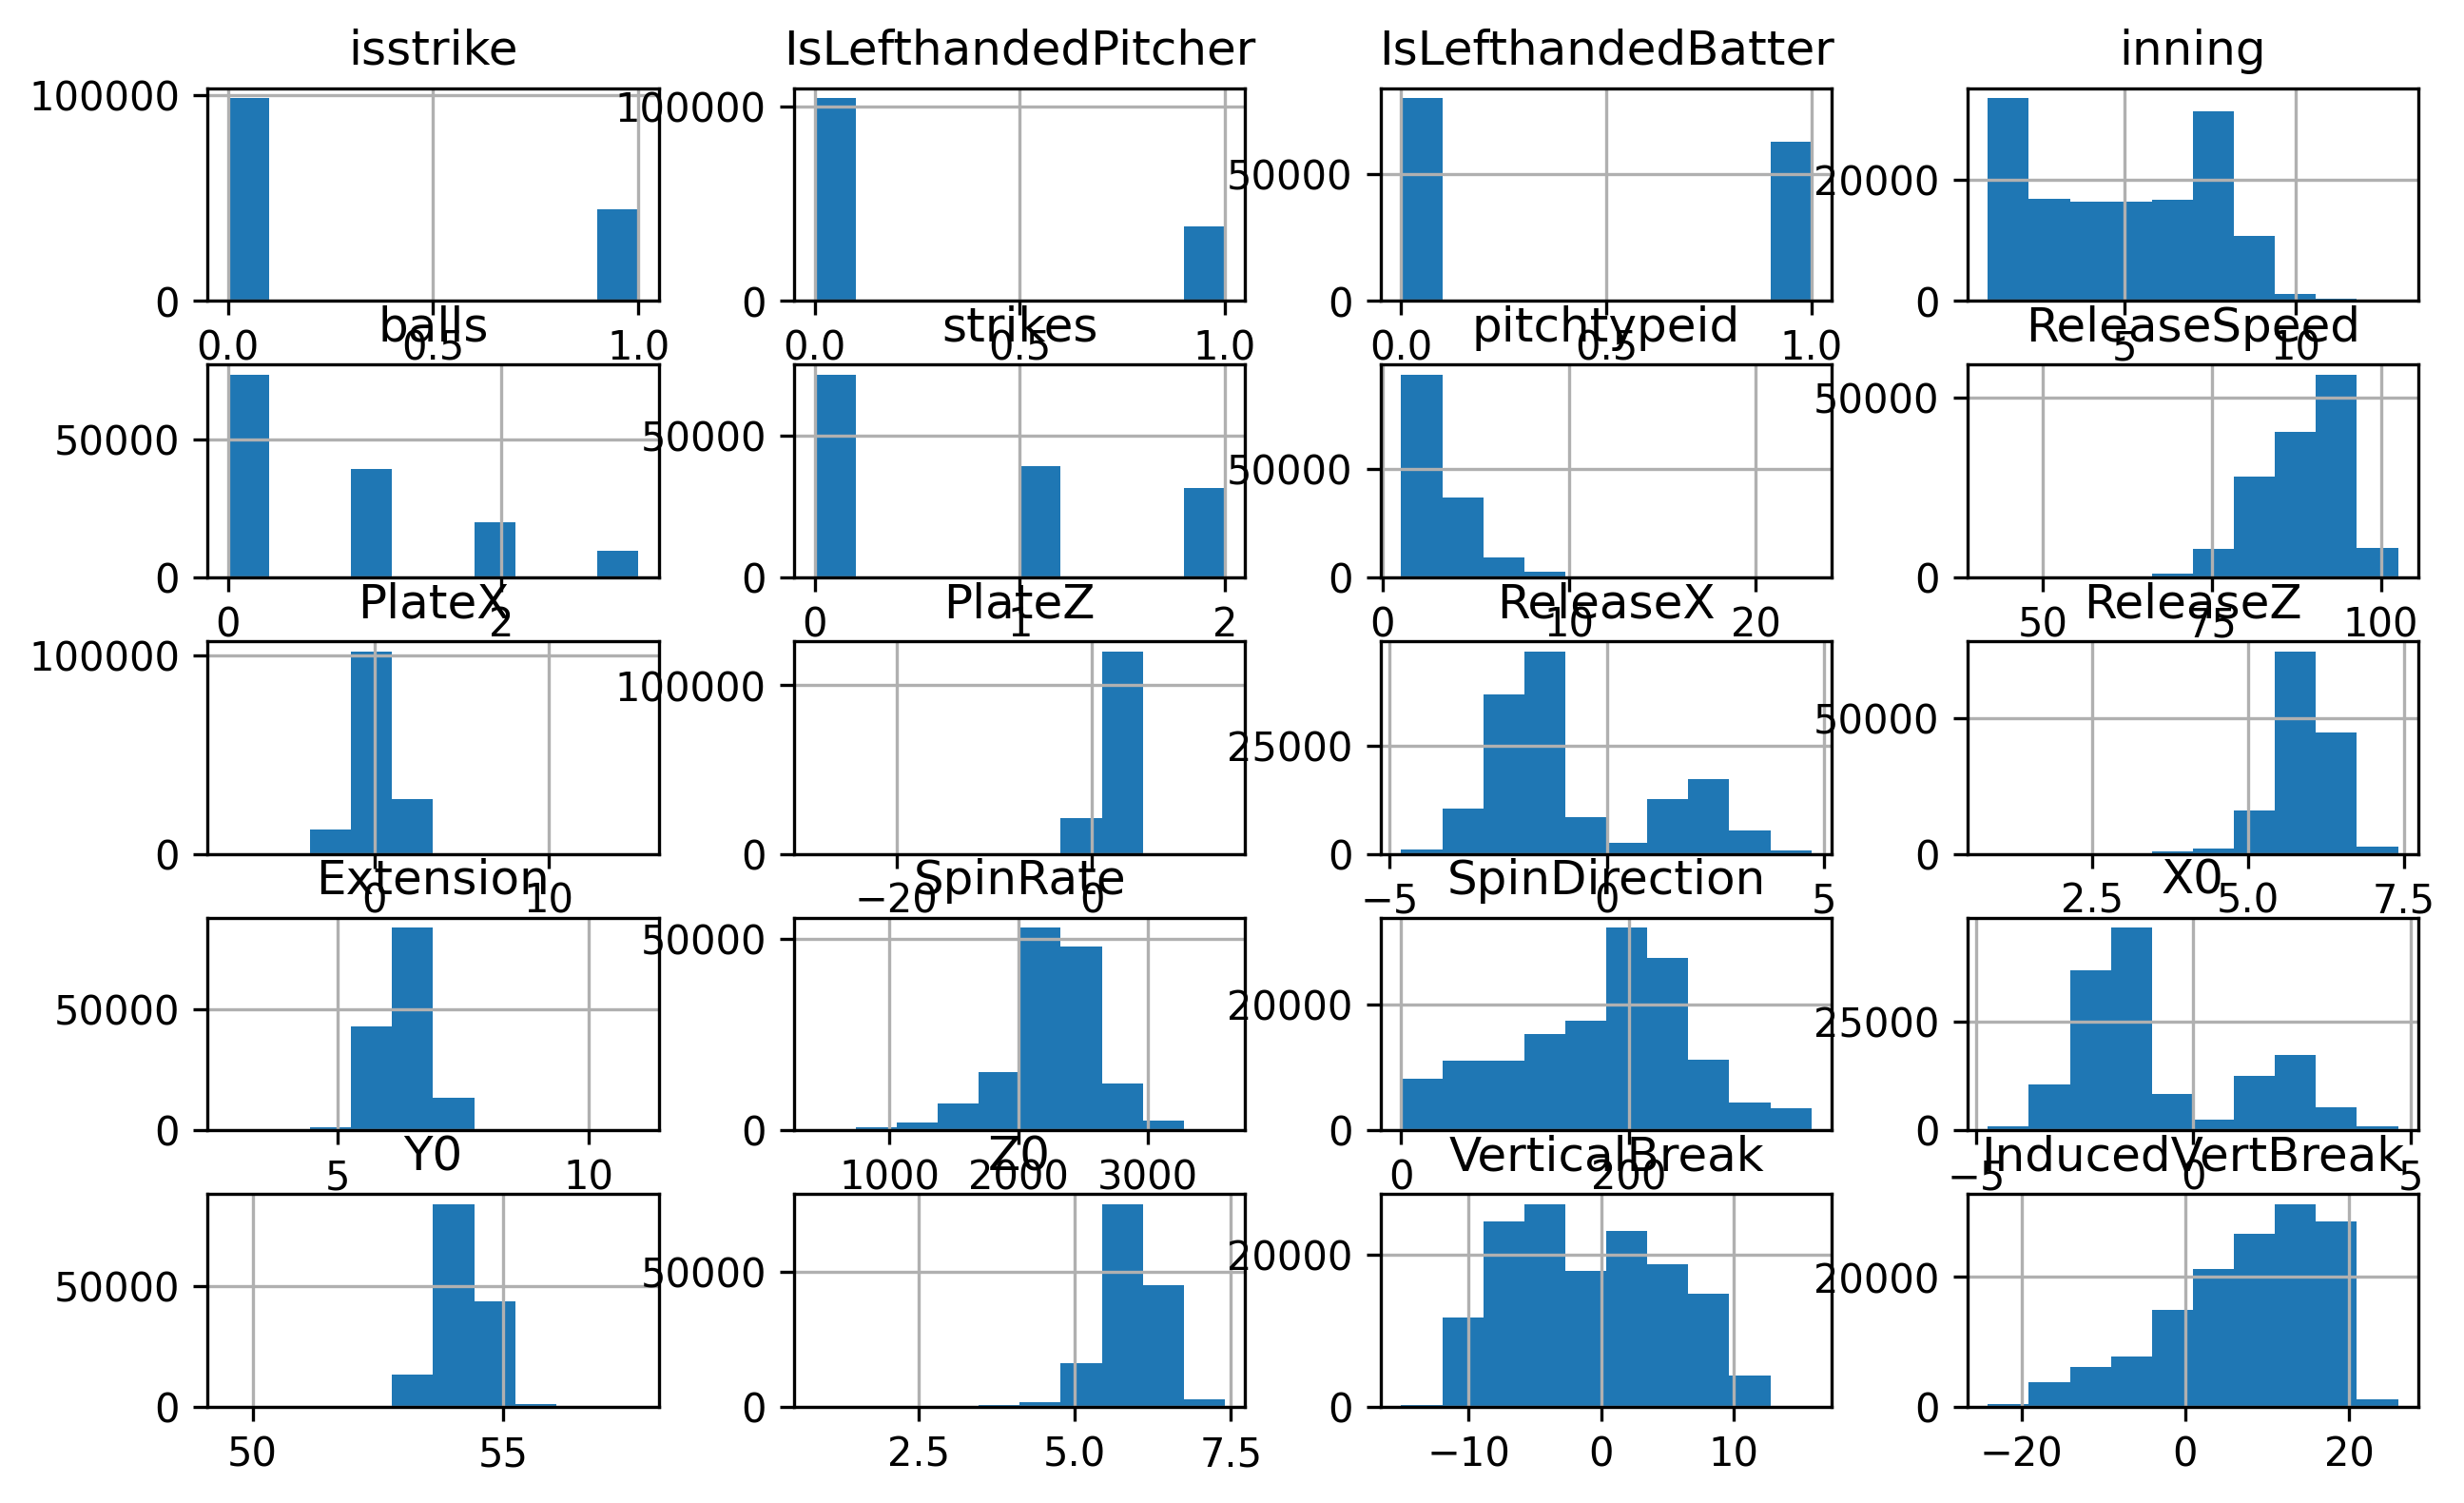

In [82]:
df.hist()

In [127]:
X = df.dropna().drop(columns=['isstrike','X0','Z0']) ## drop y column, and the column that are redundant
y = df.dropna().isstrike

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

<IPython.core.display.Javascript object>

In [38]:
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier

In [85]:
reg = Lasso()

In [86]:
reg.fit(X, y)

Lasso()

In [87]:
reg.score(X,y)

0.0010187195208978261

In [88]:
rf_clf = RandomForestClassifier(n_estimators=20, n_jobs=10)

In [89]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, n_jobs=10)

In [90]:
rf_clf.score(X_test,y_test)

0.9267749801519791

In [92]:
from xgboost import XGBClassifier

In [96]:
xgb_clf = XGBClassifier( n_jobs=10)

In [98]:
xgb_clf.fit(X_train, y_train)

/Users/Tanuj/miniforge3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/Tanuj/miniforge3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/Tanuj/miniforge3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/Tanuj/miniforge3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=10,
              num_parallel_tree=None, random_state=None, ...)

In [99]:
xgb_clf.score(X_test, y_test)

/Users/Tanuj/miniforge3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/Tanuj/miniforge3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/Tanuj/miniforge3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/Tanuj/miniforge3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

0.9294969944425542

In [135]:
import featurewiz as FW

In [136]:
wiz = FW.FeatureWiz(category_encoders='auto', feature_engg='target')

featurewiz is given 0.9 as correlation limit...
    moving target encoder from feature_engg to category_encoders list
    final list of feature engineering given: []
    final list of category encoders given: ['label', 'target']


In [137]:
X_t, y_t = wiz.fit_transform(X_train, y_train)

Loaded input data. Shape = (70536, 17)
#### Starting featurewiz transform for train data ####
    Single_Label Binary_Classification problem 
Shape of dataset: (70536, 17). Now we classify variables into different types...
Time taken to define data pipeline = 1 second(s)
No model input given...
Lazy Transformer Pipeline created...
    transformed target from object type to numeric
    Time taken to fit dataset = 1 second(s)
    Time taken to transform dataset = 1 second(s)
    Shape of transformed dataset: (70536, 17)
#### Single_Label Binary_Classification problem ####
#######################################################################################
#####  Searching for Uncorrelated List Of Variables (SULOV) in 17 features ############
#######################################################################################
    there are no null values in dataset...
    Removing (2) highly correlated variables:
    ['ReleaseX', 'Extension']
    Following (15) vars selected: ['IsLe

In [138]:
xgb_clf.fit(X_t, y_t)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=10,
              num_parallel_tree=None, random_state=None, ...)

In [139]:
wiz.features

['PlateX',
 'PlateZ',
 'ReleaseX',
 'ReleaseZ',
 'Extension',
 'SpinRate',
 'SpinDirection',
 'VerticalBreak',
 'InducedVertBreak',
 'Y0']

In [140]:
xgb_clf.score(wiz.transform(X_test), y_test)

#### Starting featurewiz transform for test data ####
Loaded input data. Shape = (70536, 17)
#### Starting lazytransform for test data ####
    Time taken to transform dataset = 1 second(s)
    Shape of transformed dataset: (70536, 17)
Returning dataframe with 10 features 


0.9264489055234206

In [141]:
dict(zip(xgb_clf.feature_names_in_, xgb_clf.feature_importances_))

{'PlateX': 0.44729772,
 'PlateZ': 0.43058485,
 'ReleaseX': 0.021581747,
 'ReleaseZ': 0.015992455,
 'Extension': 0.014327521,
 'SpinRate': 0.013806553,
 'SpinDirection': 0.015870826,
 'VerticalBreak': 0.013968353,
 'InducedVertBreak': 0.014403169,
 'Y0': 0.01216687}